# EDA Project 1

## Stakeholder
**Erin Robinson** 
- Buyer 
- Invest in poor neighbourhood, buying & selling, costs back + little profit 
- socially responsible

### 0. Reading relevant data

***Preparing data frame(s) and making data accessible / Clean-up***

---

In [190]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import seaborn as sns
from datetime import datetime, date, time, timedelta

# plotting by states -- not yet functional !!!
import plotly.figure_factory as ff

In [193]:
# create main data frame
df = pd.read_csv('../data/real-estate-KC.csv')

In [194]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,median_income,price_category,income_category,date_,date_year,date_month,renovated,built_renov_diff
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,1340,5650,47461,"200,000 - 250,000","45,000 - 50,000",2014-10-13,2014,10,0,1955.0
1,1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,...,1190,6780,47461,"200,000 - 250,000","45,000 - 50,000",2014-06-23,2014,6,0,1945.0
2,2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,...,2660,8712,47461,"400,000 - 450,000","45,000 - 50,000",2014-07-17,2014,7,0,1967.0
3,3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,...,1320,7619,47461,"200,000 - 250,000","45,000 - 50,000",2014-09-25,2014,9,0,1961.0
4,4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,...,1650,8775,47461,"150,000 - 200,000","45,000 - 50,000",2015-02-27,2015,2,0,1931.0


### 2. Building hypotheses

---

- price and number of bedrooms correlate
- poor neighborhoods have lower grades
- lot size is smaller in poor neighborhoods
- 

### 3. Testing hypotheses & building a model

---

In [195]:
pd.pivot_table(df, values='grade', index='price_category', columns='income_category')#, aggfunc=np.max)

income_category,"0 - 35,000","35,000 - 40,000","40,000 - 45,000","45,000 - 50,000","50,000 - 55,000","55,000 - 60,000","60,000 - 65,000","65,000 - 70,000","70,000 - 75,000","> 75,000"
price_category,,,,,,,,,,
"0 - 100,000",NaN,5.000000,5.111111,5.400000,NaN,6.000000,6.250000,4.000000,NaN,NaN
"100,000 - 150,000",NaN,5.846154,5.813953,5.941176,6.000000,6.400000,6.187500,6.133333,5.000000,NaN
"150,000 - 200,000",NaN,6.283019,6.479769,6.404255,5.958333,6.540984,6.489362,6.364865,5.666667,7.000000
"200,000 - 250,000",7.000000,6.670213,6.627404,6.547945,6.555556,6.987013,6.792271,6.687831,5.666667,6.400000
"250,000 - 300,000",6.666667,6.973451,6.873047,6.707207,6.895161,7.047210,7.101124,7.030581,6.761905,6.857143
"300,000 - 350,000",7.125000,6.955882,7.070240,6.984293,7.161458,7.078431,7.284404,7.248408,6.836066,6.921053
"350,000 - 400,000",7.333333,6.937500,7.088608,7.230047,7.410714,7.084677,7.459596,7.533546,7.123077,7.289157
"400,000 - 450,000",7.371429,7.176471,7.140884,7.125683,7.404412,7.150000,7.493182,7.616487,7.545455,7.398438
"450,000 - 500,000",7.357143,7.857143,7.344203,7.301205,7.591398,7.305755,7.647239,7.633588,7.676923,7.584507


> **median income** (based on zipcode): average grade does not necessarily increase while median income increases

> **Observation**: the higher the grade, the higher the price

In [189]:
df.groupby('price_category').mean()[['grade', 'condition', 'bedrooms', 'bathrooms', 
                                     'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'renovated']]

,grade,condition,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,renovated
price_category,,,,,,,,,
"0 - 100,000",5.416667,2.791667,2.000000,0.979167,783.750000,9092.708333,1245.916667,8062.041667,0.000000
"100,000 - 150,000",5.964789,3.154930,2.415493,1.072183,970.267606,8641.788732,1287.549296,9471.943662,0.028169
"150,000 - 200,000",6.399334,3.396007,2.770383,1.285774,1165.414309,11927.317804,1342.637271,9980.412646,0.021631
"200,000 - 250,000",6.672355,3.482594,2.963823,1.501536,1344.522184,10257.220478,1462.320819,9820.073038,0.021843
"250,000 - 300,000",6.946210,3.408802,3.111491,1.808802,1569.684108,10120.701711,1624.531051,9738.253790,0.022494
"300,000 - 350,000",7.129753,3.351236,3.214354,1.913855,1697.476711,10427.041350,1730.908745,10229.728612,0.016160
"350,000 - 400,000",7.281669,3.363140,3.246895,1.952310,1771.482861,12758.505216,1759.863885,11321.907104,0.018381
"400,000 - 450,000",7.339652,3.390369,3.216189,1.972464,1811.168033,13804.007172,1802.153689,11939.740779,0.025615
"450,000 - 500,000",7.491515,3.374545,3.310303,2.092121,1940.960000,13988.458788,1870.132121,12133.465455,0.034545


> higher price can be associated with higher average grade of the object

> higher pice can be associated with higher average number of bedrooms/bathrooms

In [72]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
X = df[['condition']]
y = df['median_income']
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)

# Create an OLS model
model = sms.OLS(y, X)

# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

/Users/fabioteichmann/neuefische/projects/ds-eda-project-real-estate/.venv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.02
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           2.72e-06
Time:                        15:06:58   Log-Likelihood:            -2.2322e+05
No. Observations:               20343   AIC:                         4.464e+05
Df Residuals:                   20341   BIC:                         4.465e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.041e+04    523.363    115.429      0.000    5.94e+04    6.14e+04
condition   -704.8384    150.208     -4.692      0.000    -999.259    -410.418
==============================================================================
Omnibus:                     3098.666   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6106.733
Skew:                           0.943   Prob(JB):                         0.00
Kurtosis:                       4.910   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

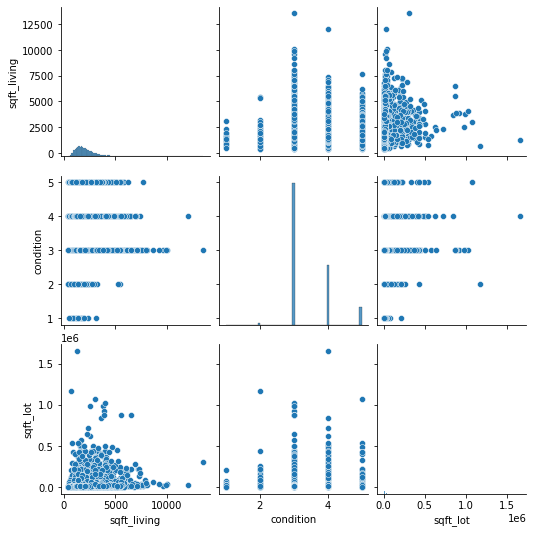

In [82]:
X3 = df[['median_income', 'sqft_living', 'condition', 'sqft_lot']]
sns.pairplot(X3);

In [83]:
X3 = sm.add_constant(X3)
y3 = df.price

model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

/Users/fabioteichmann/neuefische/projects/ds-eda-project-real-estate/.venv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     6684.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:58:59   Log-Likelihood:            -2.8272e+05
No. Observations:               20343   AIC:                         5.654e+05
Df Residuals:                   20339   BIC:                         5.655e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.015e+05   1.08e+04    -18.703      0.000   -2.23e+05    -1.8e+05
sqft_living   289.7302      2.066    140.271      0.000     285.682     293.779
condition    4.321e+04   2800.827     15.429      0.000    3.77e+04    4.87e+04
sqft_lot       -0.3095      0.045     -6.908      0.000      -0.397      -0.222
==============================================================================
Omnibus:                    13529.356   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473061.855
Skew:                           2.709   Prob(JB):                         0.00
Kurtosis:                      25.995   Cond. No.                     2.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import itertools
    
#data = {'source':['B1','B1','B1','C2','C2','C2'],
 #       'depth':[1,4,9,1,3,10],
  #      'value':[10,4,23,78,24,45]}

#df = pd.DataFrame(data)

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(18,10))

# set palette 
palette = itertools.cycle(sns.color_palette("BrBG", 7))
#df2 = df.query('price < 350000 & price > 250000')
#df3 = df.query('price < 250000 & price > 150000')
#df4 = df.query('price < 150000')

# plotting 
for source in df['price_category'].unique():
    x = df.loc[df['price_category'] == source, 'long']
    y = df.loc[df['price_category'] == source, 'lat']
    x2 = df2.loc[df2['price_category'] == source, 'long']
    y2 = df2.loc[df2['price_category'] == source, 'lat']
    x3 = df3.loc[df3['price_category'] == source, 'long']
    y3 = df3.loc[df3['price_category'] == source, 'lat']
    x4 = df4.loc[df4['price_category'] == source, 'long']
    y4 = df4.loc[df4['price_category'] == source, 'lat']
    
    # color
    c = next(palette)
    sns.regplot(x,
                y,
                scatter = True,
                fit_reg = True,
                label = source,
                ax = ax1,
                color=c, scatter_kws={'s':6})
    ax1.legend()
    """sns.regplot(x2,
                y2,
                scatter = True,
                fit_reg = False,
                label = source,
                ax = ax2,
                color=c, scatter_kws={'s':6})
    
    ax2.legend()
    sns.regplot(x3,
                y3,
                scatter = True,
                fit_reg = False,
                label = source,
                ax = ax3,
                color=c, scatter_kws={'s':6})
    sns.regplot(x4,
                y4,
                scatter = True,
                fit_reg = False,
                label = source,
                ax = ax4,
                color=c, scatter_kws={'s':6})
    #ax2.relim()
    ax2.autoscale_view()"""

plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20343 entries, 0 to 20342
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20343 non-null  int64  
 1   date             20343 non-null  object 
 2   price            20343 non-null  float64
 3   bedrooms         20343 non-null  int64  
 4   bathrooms        20343 non-null  float64
 5   sqft_living      20343 non-null  int64  
 6   sqft_lot         20343 non-null  int64  
 7   floors           20343 non-null  float64
 8   waterfront       18103 non-null  float64
 9   view             20281 non-null  float64
 10  condition        20343 non-null  int64  
 11  grade            20343 non-null  int64  
 12  sqft_above       20343 non-null  int64  
 13  sqft_basement    20343 non-null  object 
 14  yr_built         20343 non-null  int64  
 15  yr_renovated     16724 non-null  float64
 16  zipcode          20343 non-null  int64  
 17  lat         

## Additional install requirements

- plotly-geo
- geopandas==0.3.0
- pyshp==1.2.10
- shapely==1.6.3